In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
players = pd.read_csv("Players.csv")
player_data = pd.read_csv("player_data.csv")
seasons_stats = pd.read_csv("Seasons_Stats.csv")

In [3]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
# Average Career Length for players based on decade
# Store career lengths for each player in dictionary
career_length = {}
for index, row in player_data.iterrows():
    key = row['year_start'] - (row['year_start']%10) # decade in which player was in the NBA
    value = row['year_end'] - row['year_start'] + 1 # duration of player's career in the NBA
    if key != 2010:
        career_length[key] = career_length.setdefault(key,[])
        career_length[key].append(value)

In [5]:
# Calculate mean career length for each decade
for key in career_length:
    mean = sum(career_length[key]) / len(career_length[key])
    career_length[key] = mean
    print(key)
    print(mean)

1990
6.83744557329463
1960
4.966597077244259
1970
5.046715328467153
1950
3.4322916666666665
1940
2.6372881355932205
2000
6.657474600870827
1980
6.556782334384858


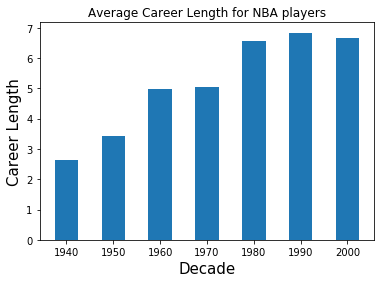

In [6]:
plt.bar(list(career_length.keys()), list(career_length.values()), width=5)
plt.xlabel('Decade', fontsize=15)
plt.ylabel('Career Length', fontsize=15)
plt.title('Average Career Length for NBA players')
plt.show()

In [7]:
# Average Career Length for players based on position
g_career_length = {}
f_career_length = {}
c_career_length = {}
for index, row in player_data.iterrows():
    key = row['year_start'] - (row['year_start']%10) # decade in which player was in the NBA
    value = row['year_end'] - row['year_start'] + 1 # duration of player's career in the NBA
    position = str(row['position'])[0] # Get the primary position of each player
    if key != 2010:
        if "G" == position:
            g_career_length[key - 2] = g_career_length.setdefault(key - 2,[])
            g_career_length[key - 2].append(value)
        if 'F' == position:
            f_career_length[key] = f_career_length.setdefault(key,[])
            f_career_length[key].append(value)
        if 'C' == position:
            c_career_length[key + 2] = c_career_length.setdefault(key + 2,[])
            c_career_length[key + 2].append(value)

In [8]:
# Calculate mean career lengths for each position
for key in g_career_length:
    mean = sum(g_career_length[key]) / len(g_career_length[key])
    g_career_length[key] = mean
for key in f_career_length:
    mean = sum(f_career_length[key]) / len(f_career_length[key])
    f_career_length[key] = mean
for key in c_career_length:
    mean = sum(c_career_length[key]) / len(c_career_length[key])
    c_career_length[key] = mean

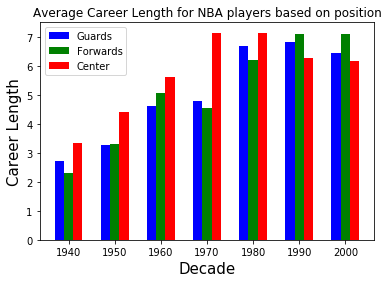

In [9]:
plt.bar(list(g_career_length.keys()), list(g_career_length.values()), color = 'b', width=2)
plt.bar(list(f_career_length.keys()), list(f_career_length.values()), color = 'g', width=2)
plt.bar(list(c_career_length.keys()), list(c_career_length.values()), color = 'r', width=2)
plt.xlabel('Decade', fontsize=15)
plt.ylabel('Career Length', fontsize=15)
plt.title('Average Career Length for NBA players based on position')
plt.legend(['Guards', 'Forwards', 'Center'])
plt.show()